In [130]:
import pandas as pd

In [131]:
data = pd.read_csv("/content/labeled_data.csv")
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [132]:
data.hate_speech.nunique()

8

In [133]:
data.hate_speech.unique()

array([0, 1, 2, 3, 4, 6, 5, 7])

In [134]:
x = data.tweet
y = data.hate_speech

In [135]:
x[0]

"!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."

In [136]:
%pip install neattext

In [137]:
import neattext as nt
import neattext.functions as nfx

In [138]:
x.apply(lambda x:nt.TextFrame(x).noise_scan())

0        {'text_noise': 18.571428571428573, 'text_lengt...
1        {'text_noise': 17.647058823529413, 'text_lengt...
2        {'text_noise': 20.0, 'text_length': 120, 'nois...
3        {'text_noise': 27.419354838709676, 'text_lengt...
4        {'text_noise': 23.357664233576642, 'text_lengt...
                               ...                        
10666    {'text_noise': 12.727272727272727, 'text_lengt...
10667    {'text_noise': 10.714285714285714, 'text_lengt...
10668    {'text_noise': 12.222222222222221, 'text_lengt...
10669    {'text_noise': 13.684210526315791, 'text_lengt...
10670    {'text_noise': 16.3265306122449, 'text_length'...
Name: tweet, Length: 10671, dtype: object

In [139]:
x = x.apply(nfx.remove_shortwords)

In [140]:
x[0]

'mayasolovely woman shouldn complain about cleaning your house should always take trash'

In [141]:
from nltk.stem import PorterStemmer, SnowballStemmer

In [142]:
def clean(x:str):
  ps = SnowballStemmer('english')
  string2 = ''
  for i in x.split():
    string2 += ' '+ ps.stem(i)
  return string2

In [143]:
x = x.apply(clean)

In [144]:
x.apply(lambda x:nt.TextFrame(x).noise_scan())

0        {'text_noise': 6.329113924050633, 'text_length...
1        {'text_noise': 0, 'text_length': 35, 'noise_co...
2        {'text_noise': 1.5384615384615385, 'text_lengt...
3        {'text_noise': 7.6923076923076925, 'text_lengt...
4        {'text_noise': 5.333333333333334, 'text_length...
                               ...                        
10666    {'text_noise': 2.7777777777777777, 'text_lengt...
10667    {'text_noise': 0, 'text_length': 39, 'noise_co...
10668    {'text_noise': 3.6363636363636362, 'text_lengt...
10669    {'text_noise': 3.7735849056603774, 'text_lengt...
10670    {'text_noise': 9.090909090909092, 'text_length...
Name: tweet, Length: 10671, dtype: object

counter vectorizer makes a list of quantity of every list

In [145]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(x)

In [146]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.1, stratify = y)

In [147]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [148]:
models = [MultinomialNB(), SVC()] #RandomForestClassifier(n_jobs = 1),
scores = []
name = []
for model in models:
  model.fit(xtrain,ytrain)
  name.append(type(model).__name__)
  scores.append(model.score(xtrain, ytrain))


<BarContainer object of 2 artists>

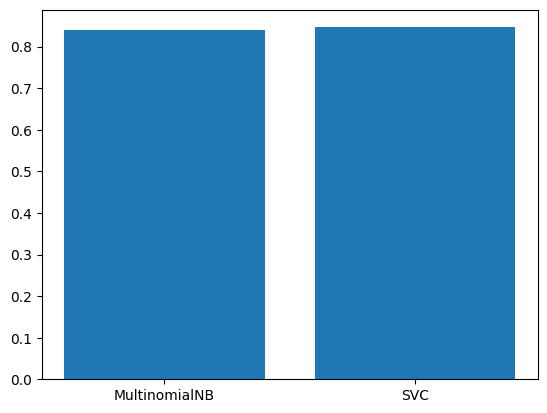

In [149]:
import matplotlib.pyplot as plt
plt.bar(name,scores)


In [150]:
scores

[0.8402582526293867, 0.8464021659897949]